In [2]:
#importing mandatory libs
import pandas as pd
import numpy as np
#visulization libs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import datetime

# Import Datasets 

In [4]:
train = pd.read_csv('train.csv')
train.head(2)

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0


In [5]:
campaign_data = pd.read_csv('campaign_data.csv')
campaign_data.head(2)

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13


In [6]:
customer_demo = pd.read_csv('customer_demographics.csv')
customer_demo.head(2)

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5


In [7]:
coupon_item_mapping = pd.read_csv('coupon_item_mapping.csv')
coupon_item_mapping.head(2)

,coupon_id,item_id
0,105,37
1,107,75


In [8]:
item_data = pd.read_csv('item_data.csv')
item_data.head(2)

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous


In [9]:
customer_transaction_data = pd.read_csv('customer_transaction_data.csv')
customer_transaction_data.head(2)

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0


# EDA 

--- EDA on Train.csv ---

In [10]:
train.head(5)

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
dtypes: int64(5)
memory usage: 3.0 MB


We have total 78369 entries ! No missing values in train !

--- EDA on Campaign Data ---

In [12]:
campaign_data.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [13]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
campaign_id      28 non-null int64
campaign_type    28 non-null object
start_date       28 non-null object
end_date         28 non-null object
dtypes: int64(1), object(3)
memory usage: 976.0+ bytes


We have total 28 entries, lets convert 'start_data' and 'end_date' into actutal datetime object 

In [14]:
campaign_data['start_date'] = pd.to_datetime(campaign_data['start_date'],dayfirst=True)
campaign_data['end_date'] = pd.to_datetime(campaign_data['end_date'], dayfirst=True)

In [15]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
campaign_id      28 non-null int64
campaign_type    28 non-null object
start_date       28 non-null datetime64[ns]
end_date         28 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 976.0+ bytes


In [16]:
campaign_data['Diff Start and end date'] = campaign_data['end_date']-campaign_data['start_date']
campaign_data['Diff Start and end date'] = campaign_data['Diff Start and end date']/np.timedelta64(1,'D')
campaign_data

,campaign_id,campaign_type,start_date,end_date,Diff Start and end date
0,24,Y,2013-10-21,2013-12-20,60.0
1,25,Y,2013-10-21,2013-11-22,32.0
2,20,Y,2013-09-07,2013-11-16,70.0
3,23,Y,2013-10-08,2013-11-15,38.0
4,21,Y,2013-09-16,2013-10-18,32.0
5,22,X,2013-09-16,2013-10-18,32.0
6,18,X,2013-08-10,2013-10-04,55.0
7,19,Y,2013-08-26,2013-09-27,32.0
8,17,Y,2013-07-29,2013-08-30,32.0
9,16,Y,2013-07-15,2013-08-16,32.0


we contains negative diiference between start and end date

C:\Users\Milind\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(734685.0, 735234.0)

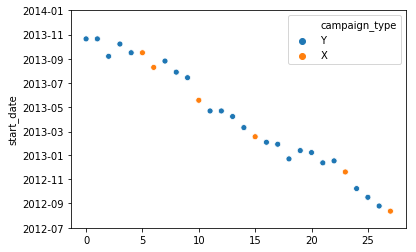

In [17]:
sns.scatterplot(y='start_date',hue='campaign_type',x=campaign_data.index,data=campaign_data)
plt.ylim('2012-07-01','2014-01-01')

we see campaign following pattern campaign_type	Anonymised Campaign Type (X/Y)

--- EDA on customer_demographic ---

In [18]:
customer_demo

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5
5,11,70+,Single,0,2,NaN,1
6,12,46-55,Married,0,2,NaN,7
7,13,36-45,Single,0,1,NaN,2
8,14,26-35,Married,1,2,NaN,6
9,15,46-55,Married,0,2,NaN,6


In [19]:
customer_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    431 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    222 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.6+ KB


In [20]:
customer_demo['age_range'].value_counts()

46-55    271
36-45    187
26-35    130
70+       68
56-70     59
18-25     45
Name: age_range, dtype: int64

There are total 6 range of age_range

In [21]:
#let fill nan value for no_of-childeren
customer_demo['no_of_children'].fillna(0,inplace=True)

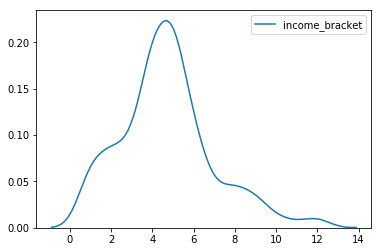

In [22]:
#checking income_bracket distribution
sns.kdeplot(customer_demo['income_bracket'])

In [23]:
#dealing with 3+ values in no_of_children column
customer_demo['no_of_children'] = pd.to_numeric(customer_demo['no_of_children'],errors='coerce')
customer_demo['no_of_children'] = customer_demo['no_of_children'].replace(np.nan, 3, regex=True)
customer_demo['no_of_children'] = customer_demo['no_of_children'].astype(int)

In [24]:
#dealing with 5+ values in family_size
customer_demo['family_size'] = pd.to_numeric(customer_demo['family_size'],errors='coerce')
customer_demo['family_size'] = customer_demo['family_size'].replace(np.nan, 5, regex=True)
customer_demo['family_size'] = customer_demo['family_size'].astype(int)
customer_demo.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,0,4
1,6,46-55,Married,0,2,0,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,0,5


In [25]:
#changing married = 1 and single = 0  
customer_demo['marital_status'].replace(to_replace=['Single','Married'], value=[0,1],inplace=True)
customer_demo.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,1.0,0,2,0,4
1,6,46-55,1.0,0,2,0,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,0.0,0,1,0,5


In [26]:
#filling NaN values in marital status
customer_demo['marital_status'] = customer_demo.apply(lambda row: 1 if row['family_size']-row['no_of_children'] > 1 else 0,axis=1)

Only problem is now with age_range 
coverting dtype in categorial and doing get_dummies or one_hot_encoding might help

--- EDA on Item data ---

In [27]:
item_data.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [28]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
item_id       74066 non-null int64
brand         74066 non-null int64
brand_type    74066 non-null object
category      74066 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [29]:
#lets see unique values in category
item_data['category'].unique()

array(['Grocery', 'Miscellaneous', 'Bakery', 'Pharmaceutical',
       'Packaged Meat', 'Seafood', 'Natural Products',
       'Dairy, Juices & Snacks', 'Prepared Food', 'Skin & Hair Care',
       'Meat', 'Travel', 'Flowers & Plants', 'Fuel', 'Salads', 'Alcohol',
       'Garden', 'Restauarant', 'Vegetables (cut)'], dtype=object)

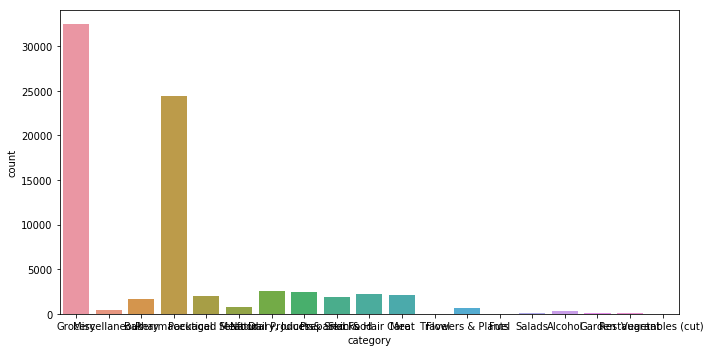

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='category',data=item_data)
plt.tight_layout()